In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = "processed_dataset.csv"



In [6]:
merged_df = pd.read_csv(data)

In [7]:
merged_df

,Unnamed: 0,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,...,Pressure_Avg_Freq,airdensity,p_wind,cp_actual,tsr,timestamp,cp_lambdamodel,cp_difference,cp_xgboost,p_xgboost
0,3,T07,2016-01-08 23:10:00+00:00,1654.7,1247.6,1480.6,106.6,46,71,71,...,406,1.203715,1313.352860,0.478165,8.818899,2016-01-08 23:10:00+00:00,(0.3340752426476843-6.212704716339263e-08j),0.144090,NaN,NaN
1,5,T07,2016-04-19 12:20:00+00:00,1766.4,1591.8,1681.7,26.1,66,124,122,...,405,1.206663,7862.501976,0.254067,5.528708,2016-04-19 12:20:00+00:00,(0.37602658252117527+0j),-0.121960,NaN,NaN
2,11,T07,2016-04-19 12:30:00+00:00,1777.7,1562.6,1675.3,31.3,67,124,123,...,405,1.206663,6969.940919,0.278109,5.716669,2016-04-19 12:30:00+00:00,(0.3923889001982575+0j),-0.114280,NaN,NaN
3,12,T07,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46,73,72,...,405,1.202518,1427.752320,0.483487,8.573930,2016-01-08 23:50:00+00:00,(0.35888034851899103-5.853230212509341e-08j),0.124607,NaN,NaN
4,16,T07,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67,123,122,...,405,1.210836,4851.993937,0.374650,6.457718,2016-04-19 12:40:00+00:00,(0.4341989273784258+0j),-0.059549,0.373801,1813.678416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35765,207873,T07,2016-10-24 20:50:00+00:00,1288.9,1229.8,1249.2,8.6,39,56,56,...,402,1.186701,191.209805,0.325297,14.137167,2016-10-24 20:50:00+00:00,0j,0.325297,NaN,NaN
35766,207883,T07,2016-07-01 11:10:00+00:00,1309.1,1213.9,1253.5,15.3,44,61,61,...,410,1.184099,259.599187,0.318183,12.757931,2016-07-01 11:10:00+00:00,0j,0.318183,NaN,NaN
35767,207884,T07,2016-07-11 00:50:00+00:00,1680.9,1439.7,1595.4,55.5,50,74,74,...,407,1.168782,1833.067741,0.463322,8.410720,2016-07-11 00:50:00+00:00,(0.37398769636312906-6.884959428723044e-08j),0.089334,NaN,NaN
35768,207888,T07,2016-10-14 12:50:00+00:00,1337.3,1184.0,1262.5,20.1,42,64,64,...,403,1.191937,393.650426,0.376476,11.229523,2016-10-14 12:50:00+00:00,0j,0.376476,NaN,NaN


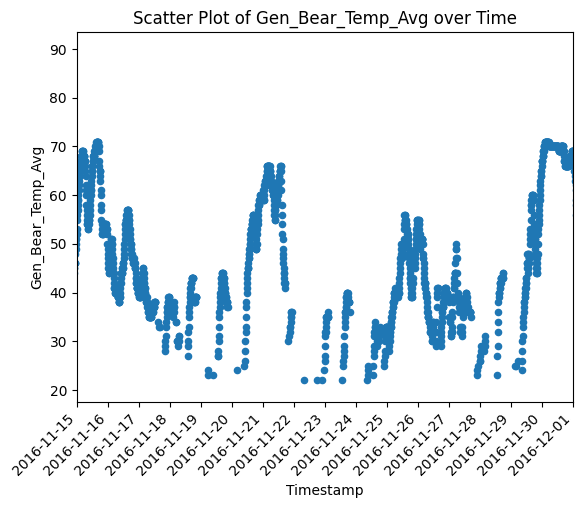

In [13]:
# plotting some data to look for outliers and anomalties in the data itself. Visualize the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#for i in merged_df:
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

ax = merged_df.plot.scatter(x="Timestamp", y="Gen_Bear_Temp_Avg")

# Customize the format of the timestamp on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optionally, set the locator for more control over tick placement
ax.xaxis.set_major_locator(mdates.DayLocator())  # You can adjust the locator based on your data frequency

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
#Define interval for data
plt.xlim(pd.Timestamp('2016-11-15'), pd.Timestamp('2016-12-01'))

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Gen_Bear_Temp_Avg')
plt.title('Scatter Plot of Gen_Bear_Temp_Avg over Time')

# Show the plot
plt.show()


In [ ]:

# Step 2: Specify the feature columns and the target variable
feature_columns = ["Gen_Phase1_Temp_Avg","Gen_RPM_Avg","Avg_Windspeed1","Nac_Temp_Avg","Avg_Humidity"]  # List your feature column names
target_column = 'Gen_Bear_Temp_Avg'  # Your target variable name

# Step 3: Prepare the data
X = merged_df[feature_columns]  # Feature set
y = merged_df[target_column]  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(
    X, y, merged_df.index, test_size=0.2, random_state=42
)

# Step 5: Initialize the XGBoost model
model = XGBRegressor()  # Use XGBClassifier() if it's a classification task

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

# Step 8: Evaluate the model (Optional)
if isinstance(y, pd.Series) and y.nunique() <= 2:
    # If the target variable has two unique values, treat it as a classification problem
    accuracy = accuracy_score(y_test, predictions.round())
    print(f'Accuracy: {accuracy:.2f}')
else:
    # If it's a regression problem, calculate the mean squared error
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse:.2f}')

merged_df.loc[test_index, "cp_xgboost"] = predictions